In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}

ytd_df = pd.read_csv('Cleaned_YTD_Arrests.csv', dtype=data_types)

In [23]:
df_date_min = ytd_df['ARREST_DATE'].dt.month.min()
df_date_max= ytd_df['ARREST_DATE'].dt.month.max()
print(f'The min month recorded in datatset is {df_date_min} and the max is {df_date_max}')

The min month recorded in datatset is 1 and the max is 3


In [3]:
ytd_df['ARREST_DATE'] = pd.to_datetime(ytd_df['ARREST_DATE'])

In [4]:
ytd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63210 entries, 0 to 63209
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ARREST_DATE               63210 non-null  datetime64[ns]
 1   PD_DESC                   63210 non-null  category      
 2   KY_CD                     63210 non-null  float64       
 3   OFNS_DESC                 63210 non-null  category      
 4   LAW_CODE                  63210 non-null  category      
 5   LAW_CAT_CD                63210 non-null  category      
 6   ARREST_BORO               63210 non-null  category      
 7   ARREST_PRECINCT           63210 non-null  category      
 8   JURISDICTION_CODE         63210 non-null  category      
 9   AGE_GROUP                 63210 non-null  category      
 10  PERP_SEX                  63210 non-null  category      
 11  PERP_RACE                 63210 non-null  category      
 12  Latitude          

In [5]:
ytd_df.isna().sum()

ARREST_DATE                 0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [6]:
ytd_df.duplicated().sum()

5873

In [7]:
duplicate_rows = ytd_df[ytd_df.duplicated(keep=False)]
duplicate_rows.head(10)

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,New Georeferenced Column
6,2024-01-19,JOSTLING,230.0,JOSTLING,PL 1652501,Misdemeanor,Manhattan,6,0,25-44,Male,BLACK,40.737547,-74.000415,POINT (-74.000415 40.737547)
8,2024-01-31,RAPE 2,104.0,RAPE,PL 1303001,Felony,Bronx,41,0,18-24,Male,BLACK,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)
12,2024-01-26,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,Felony,Brooklyn,77,0,18-24,Male,BLACK,40.674593,-73.930572,POINT (-73.930572 40.674593)
27,2024-01-13,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Manhattan,26,0,<18,Male,BLACK,40.814845,-73.956312,POINT (-73.956312 40.814845)
34,2024-01-29,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Bronx,49,0,25-44,Female,BLACK,40.865997,-73.870438,POINT (-73.870438 40.865997)
36,2024-01-12,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Manhattan,23,0,25-44,Male,BLACK,40.796073,-73.943485,POINT (-73.94348479163442 40.79607335719217)
39,2024-01-26,"LARCENY,GRAND OF AUTO",110.0,GRAND LARCENY OF MOTOR VEHICLE,PL 1553008,Felony,Queens,114,0,18-24,Male,BLACK HISPANIC,40.759373,-73.942047,POINT (-73.942047 40.759373)
42,2024-01-11,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Queens,113,0,45-64,Male,BLACK,40.680077,-73.775929,POINT (-73.775929 40.680077)
46,2024-01-24,"LEWDNESS,PUBLIC",361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 24500BI,Misdemeanor,Manhattan,18,0,25-44,Male,BLACK,40.765390,-73.985702,POINT (-73.985702 40.76539)
49,2024-01-17,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,Misdemeanor,Bronx,44,1,25-44,Male,BLACK,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [8]:
duplicate_rows = ytd_df[ytd_df.duplicated(subset=['ARREST_DATE', 'LAW_CODE'], keep=False)]

print("Duplicate rows based on 'ARREST_DATE' and 'LAW_CODE':")
print(duplicate_rows)


Duplicate rows based on 'ARREST_DATE' and 'LAW_CODE':
      ARREST_DATE                         PD_DESC  KY_CD  \
0      2024-01-10  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
2      2024-01-03                       ASSAULT 3  344.0   
3      2024-01-19  CONTROLLED SUBSTANCE, POSSESSI  235.0   
4      2024-01-11        ASSAULT 2,1,UNCLASSIFIED  106.0   
5      2024-02-01                          RAPE 1  104.0   
...           ...                             ...    ...   
63204  2024-03-08  FORGERY,ETC.,UNCLASSIFIED-FELO  113.0   
63205  2024-02-27  LARCENY,PETIT FROM OPEN AREAS,  341.0   
63206  2024-03-12  CONTROLLED SUBSTANCE, POSSESSI  235.0   
63207  2024-03-07  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
63209  2024-03-10            TRESPASS 3, CRIMINAL  352.0   

                          OFNS_DESC    LAW_CODE   LAW_CAT_CD    ARREST_BORO  \
0                           ROBBERY  PL 1601001       Felony      Manhattan   
2      ASSAULT 3 & RELATED OFFENSES  PL 1200001  Misdemeanor       

#### Despite duplicate sum count beeing 5,873 the rows displayed using the duplicate function display different Arrest Dates, PD Descriptions, and Offense description. Diving deeper only using Arrest Date and Law code it may look as if there are duplicates but the variating longitude and lattitude values suggest they are not duplicates

### Arrests by Month

In [9]:
ytd_df['ARREST_MONTH'] = ytd_df['ARREST_DATE'].dt.month
unique_months = ytd_df['ARREST_MONTH'].unique()
unique_months.sort()
print("Unique months listed in the ARREST_DATE column:")
print(unique_months)

Unique months listed in the ARREST_DATE column:
[1 2 3]


In [10]:
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']

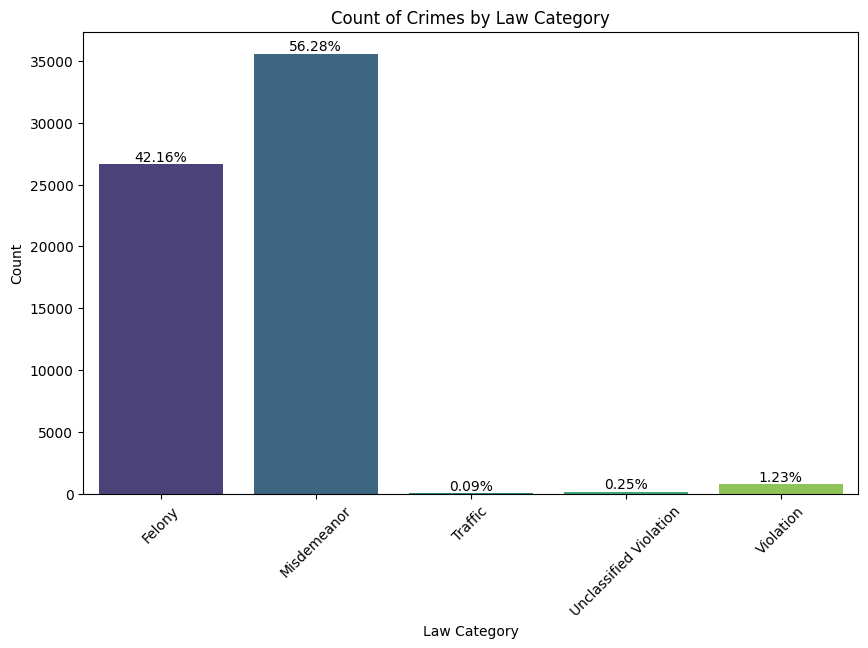

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=ytd_df, x='LAW_CAT_CD', order=law_cat_order, palette='viridis')
total_count = ytd_df.shape[0]
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Crimes by Law Category')
plt.xlabel('Law Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

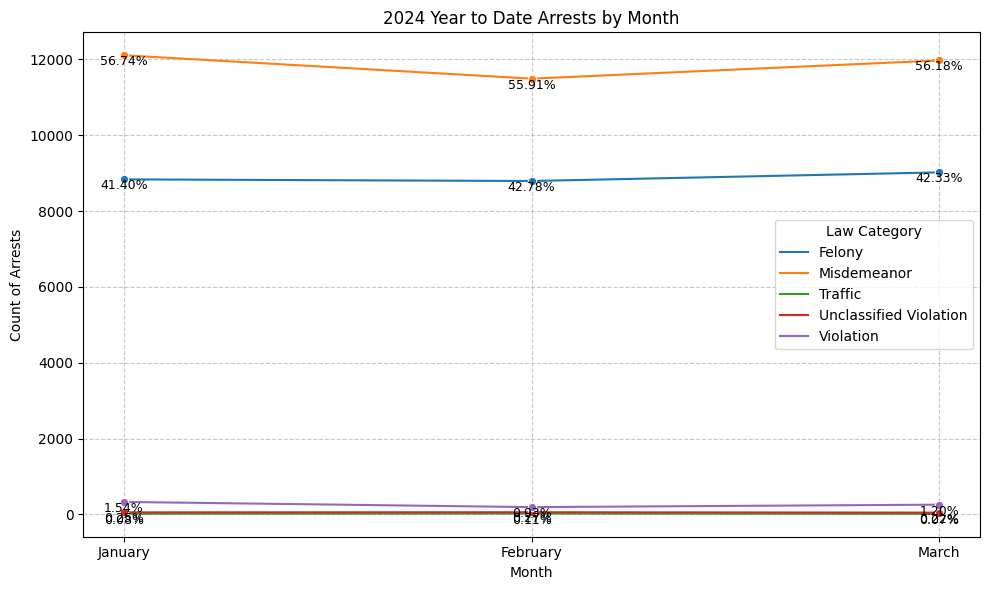

In [12]:
agg_df = ytd_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
months_of_interest = [1, 2, 3]
agg_df = agg_df[agg_df['ARREST_MONTH'].isin(months_of_interest)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')

plt.title('2024 Year to Date Arrests by Month')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
month_labels = ['January', 'February', 'March']
plt.xticks(months_of_interest, month_labels)

plt.legend(title='Law Category')
total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum()

for month in months_of_interest:
    if month in total_counts.index:
        total_count = total_counts.loc[month]
        subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
        for _, row in subset_df.iterrows():
            percentage = (row['count'] / total_count) * 100
            plt.text(row['ARREST_MONTH'], row['count'], f'{percentage:.2f}%', ha='center', va='top', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Arrests By Borough

##### Bronx

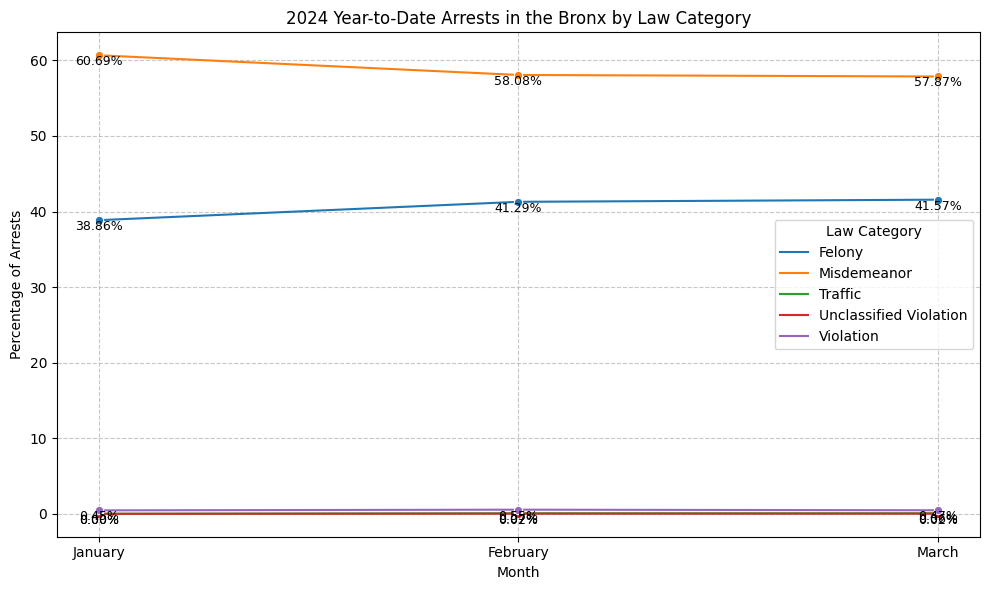

In [13]:
bronx_df = ytd_df[(ytd_df['ARREST_BORO'] == 'Bronx') & (ytd_df['ARREST_MONTH'].isin([1, 2, 3]))]
agg_df = bronx_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')

total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df = agg_df.merge(total_counts, on='ARREST_MONTH')
agg_df['percentage'] = (agg_df['count'] / agg_df['total_count']) * 100
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
months_of_interest = [1, 2, 3]
month_names = ['January', 'February', 'March']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
for month in months_of_interest:
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)

plt.title('2024 Year-to-Date Arrests in the Bronx by Law Category')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months_of_interest, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Brooklyn

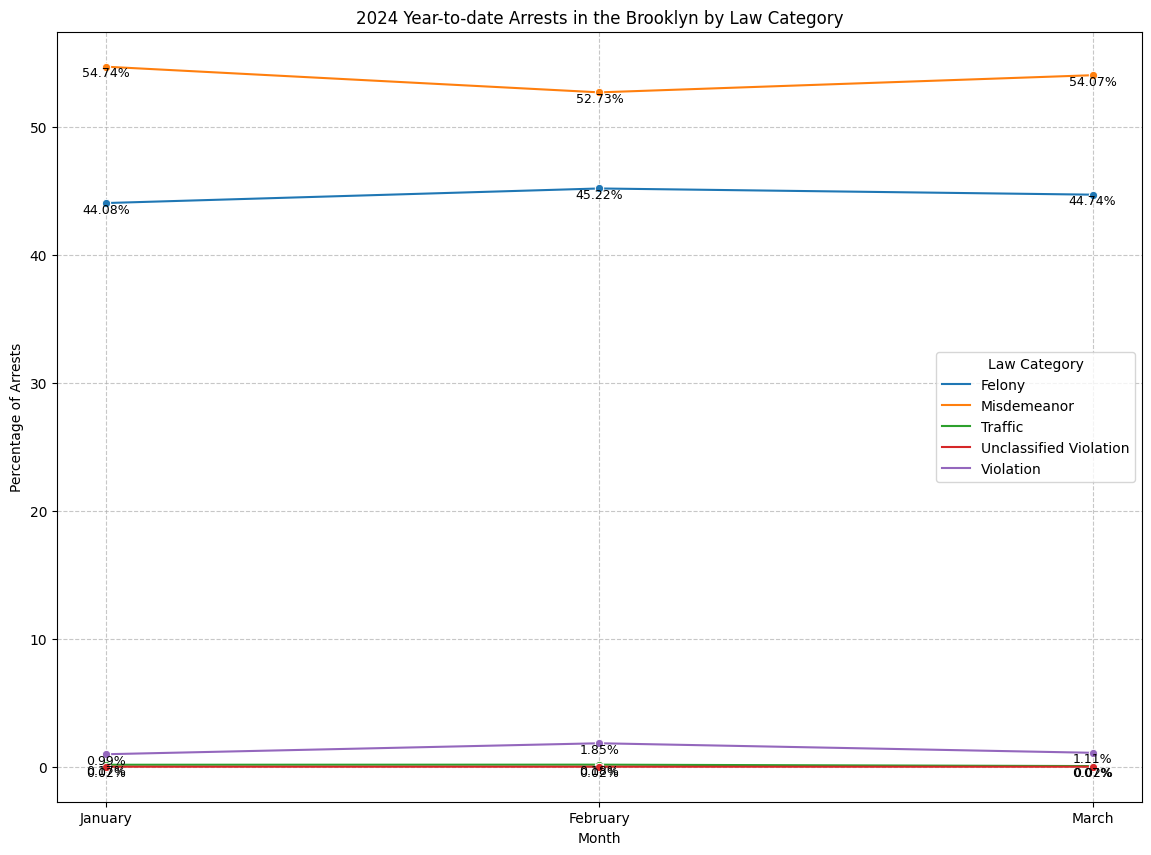

In [14]:
brooklyn_df = ytd_df[(ytd_df['ARREST_BORO'] == 'Brooklyn') & (ytd_df['ARREST_MONTH'].isin([1,2,3]))]
agg_df_2 = brooklyn_df.groupby(['ARREST_MONTH','LAW_CAT_CD']).size().reset_index(name='count')
total_count = agg_df_2.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df_2 = agg_df_2.merge(total_count, on='ARREST_MONTH')
agg_df_2['percentage'] = (agg_df_2['count']/agg_df_2['total_count']) *100

plt.figure(figsize=(14,10))
sns.lineplot(data=agg_df_2, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
for month in months_of_interest:
    subset_df_2 =agg_df_2[agg_df_2['ARREST_MONTH']== month]
    for _, row in subset_df_2.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)

plt.title('2024 Year-to-date Arrests in the Brooklyn by Law Category')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months_of_interest, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

#### Queens

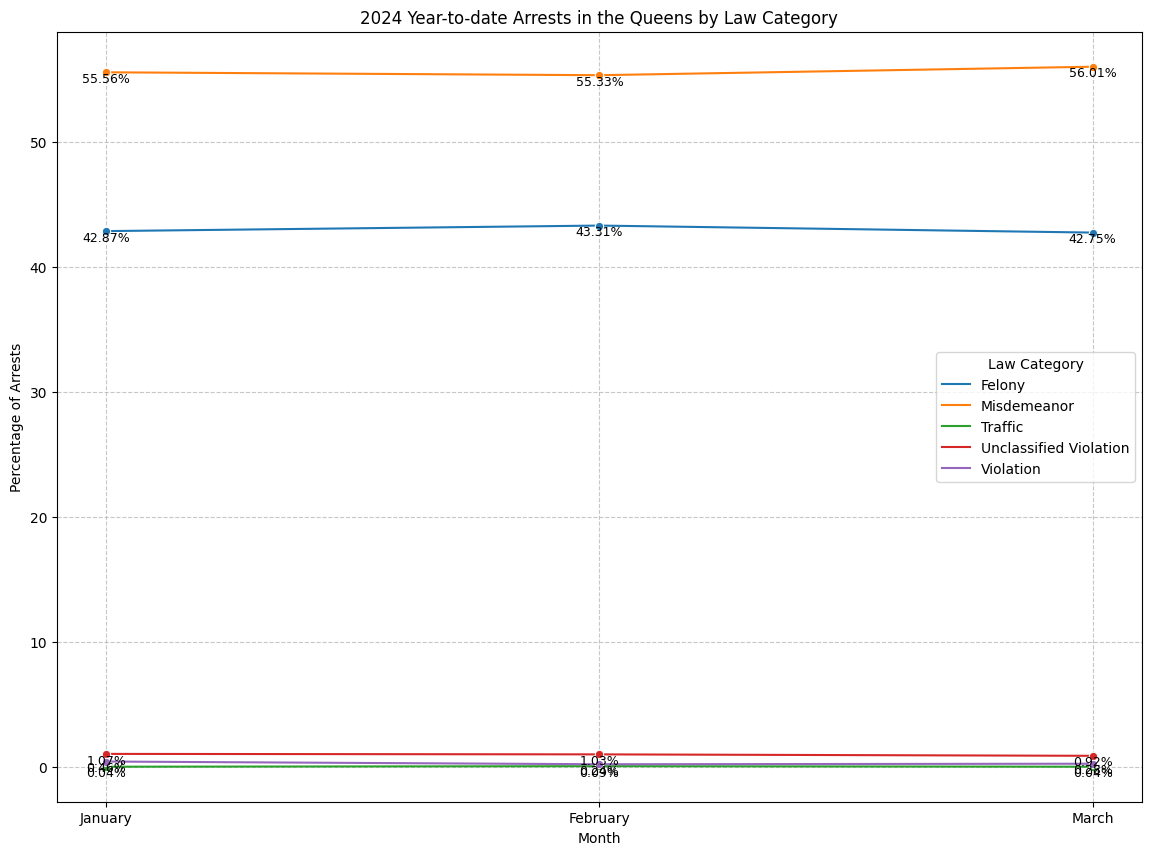

In [15]:
queens_df = ytd_df[(ytd_df['ARREST_BORO'] == 'Queens') & (ytd_df['ARREST_MONTH'].isin([1,2,3]))]
agg_df_2 = queens_df.groupby(['ARREST_MONTH','LAW_CAT_CD']).size().reset_index(name='count')
total_count = agg_df_2.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df_2 = agg_df_2.merge(total_count, on='ARREST_MONTH')
agg_df_2['percentage'] = (agg_df_2['count']/agg_df_2['total_count']) *100

plt.figure(figsize=(14,10))
sns.lineplot(data=agg_df_2, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
for month in months_of_interest:
    subset_df_2 =agg_df_2[agg_df_2['ARREST_MONTH']== month]
    for _, row in subset_df_2.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)

plt.title('2024 Year-to-date Arrests in the Queens by Law Category')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months_of_interest, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

#### Manhattan

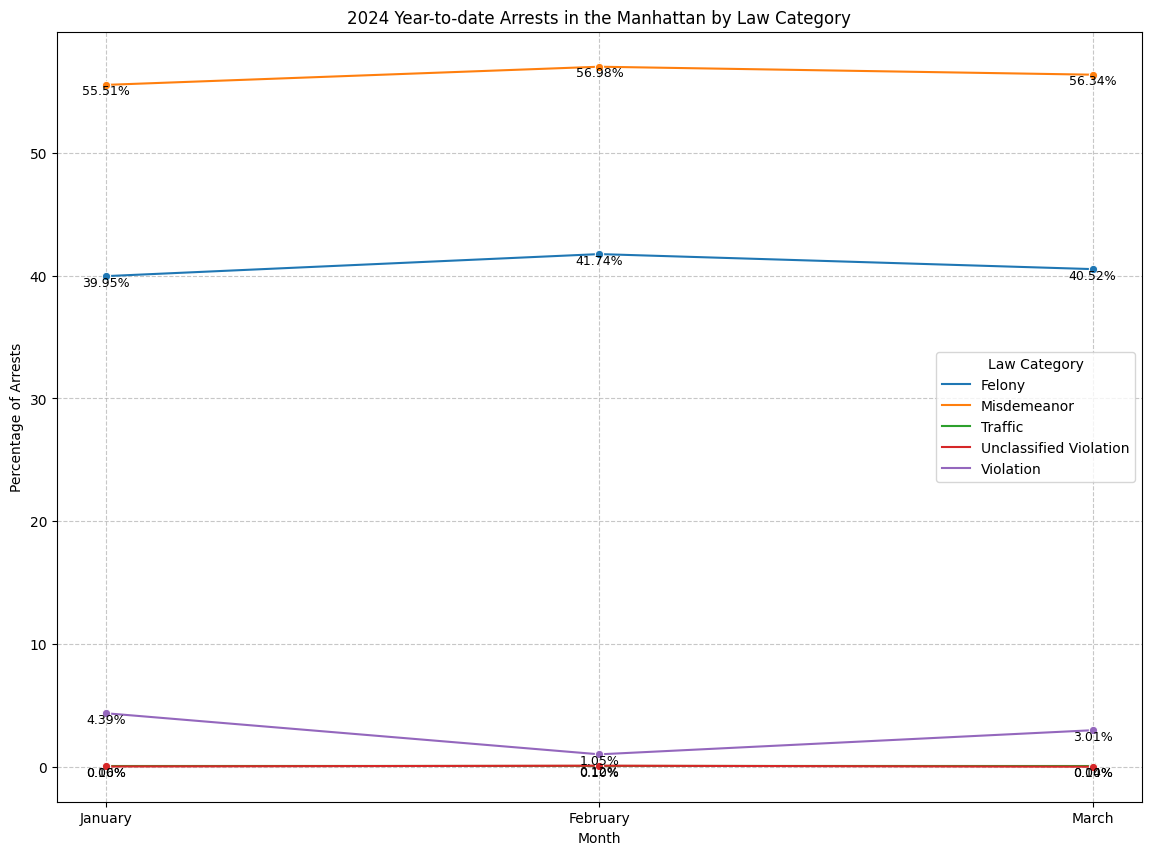

In [16]:
manhattan_df = ytd_df[(ytd_df['ARREST_BORO'] == 'Manhattan') & (ytd_df['ARREST_MONTH'].isin([1,2,3]))]
agg_df_2 = manhattan_df.groupby(['ARREST_MONTH','LAW_CAT_CD']).size().reset_index(name='count')
total_count = agg_df_2.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df_2 = agg_df_2.merge(total_count, on='ARREST_MONTH')
agg_df_2['percentage'] = (agg_df_2['count']/agg_df_2['total_count']) *100

plt.figure(figsize=(14,10))
sns.lineplot(data=agg_df_2, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
for month in months_of_interest:
    subset_df_2 =agg_df_2[agg_df_2['ARREST_MONTH']== month]
    for _, row in subset_df_2.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)

plt.title('2024 Year-to-date Arrests in the Manhattan by Law Category')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months_of_interest, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

#### Total Arrests by Borough

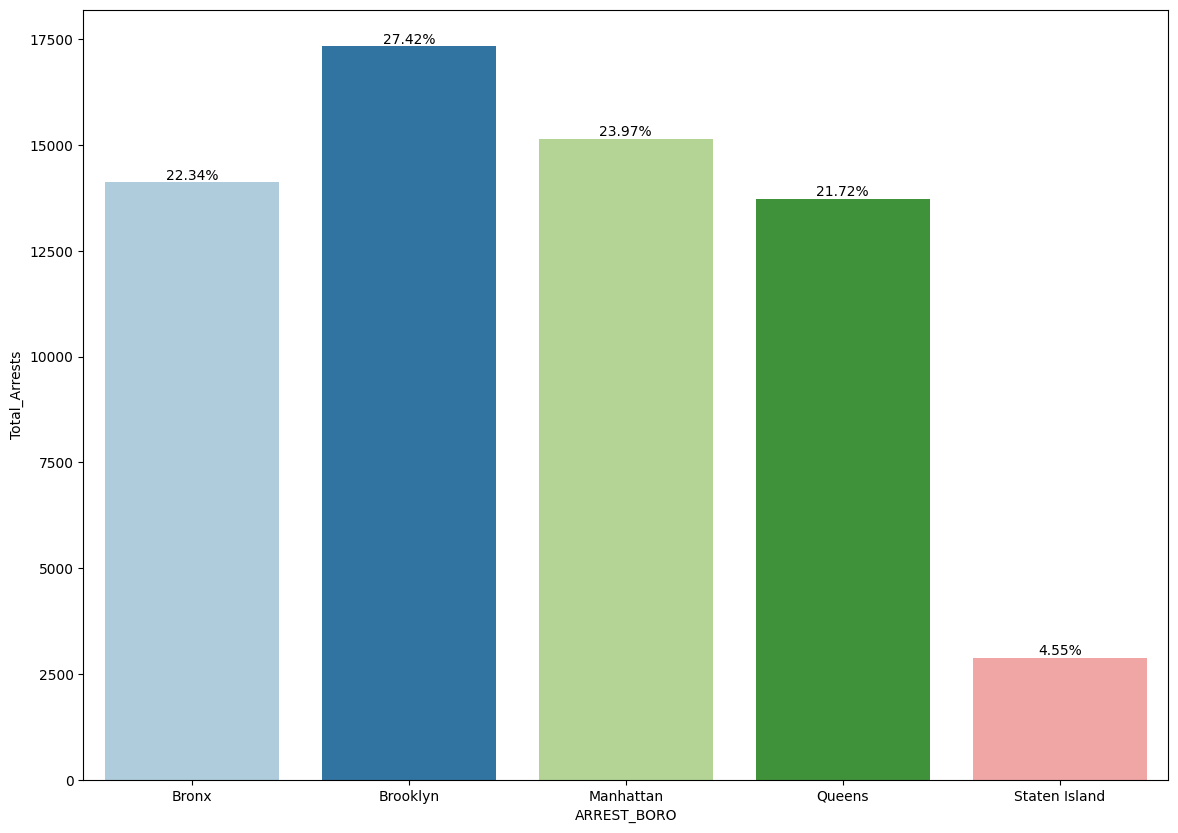

In [17]:
arrests_by_borough = ytd_df.groupby('ARREST_BORO').size().reset_index(name='Total_Arrests')
plt.figure(figsize=(14,10))
ax = sns.barplot(data=arrests_by_borough, x='ARREST_BORO', y='Total_Arrests',palette='Paired')
arrests_total_count = arrests_by_borough['Total_Arrests'].sum()
for p in ax.patches:
    percentage = (p.get_height() / arrests_total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

### Geospatial Plotting

#### Felonies

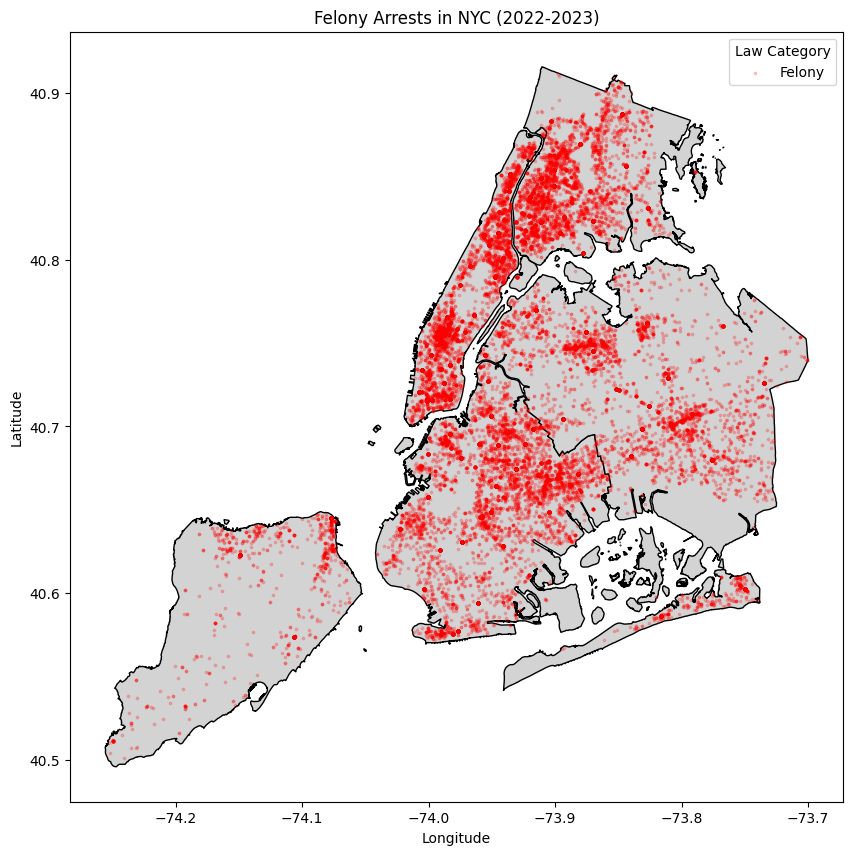

In [18]:
gdf_arrests = gpd.GeoDataFrame(
    ytd_df, geometry=gpd.points_from_xy(ytd_df['Longitude'], ytd_df['Latitude']))

gdf_arrests.set_crs(epsg=4326, inplace=True)
gdf_felonies = gdf_arrests[gdf_arrests['LAW_CAT_CD'] == 'Felony']
gdf_nyc = gpd.read_file("Borough Boundaries.zip")
gdf_nyc = gdf_nyc.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(14, 10))
gdf_nyc.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_felonies.plot(ax=ax, markersize=3, alpha=0.2, color='red', label='Felony')
plt.title('Felony Arrests in NYC (2022-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Law Category')

# Show plot
# plt.savefig('2022-2023 Felony GeoSpatial Plotting')
# plt.show()


#### Misdemeanors

In [19]:
gdf_arrests = gpd.GeoDataFrame(
    ytd_df, geometry=gpd.points_from_xy(ytd_df['Longitude'], ytd_df['Latitude'])
)
gdf_arrests.set_crs(epsg=4326, inplace=True)
def plot_arrests_by_category(category, color, title, filename):
    gdf_category = gdf_arrests[gdf_arrests['LAW_CAT_CD'] == category]
    
    # Needed to filter as the displayed Geomap was too small but still cutting off Manhattan
    gdf_category = gdf_category[
        (gdf_category['Longitude'] >= -74.3) & 
        (gdf_category['Longitude'] <= -73.7) & 
        (gdf_category['Latitude'] >= 40) & 
        (gdf_category['Latitude'] <= 41)
    ]
    gdf_nyc = gpd.read_file("Borough Boundaries.zip")
    gdf_nyc = gdf_nyc.to_crs(epsg=4326)
    fig, ax = plt.subplots(figsize=(14, 10))
    gdf_nyc.plot(ax=ax, color='lightgrey', edgecolor='black')
    gdf_category.plot(ax=ax, markersize=2, alpha=0.1, color=color, label=category)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(-74.3, -73.7)
    plt.ylim(40, 40.9)
    plt.legend(title='Law Category')
    plt.show()
plot_arrests_by_category('Misdemeanor', 'blue', filename='Misdemeanor Arrests in NYC (2022-2023)')


TypeError: plot_arrests_by_category() missing 1 required positional argument: 'title'

ValueError: aspect must be finite and positive 

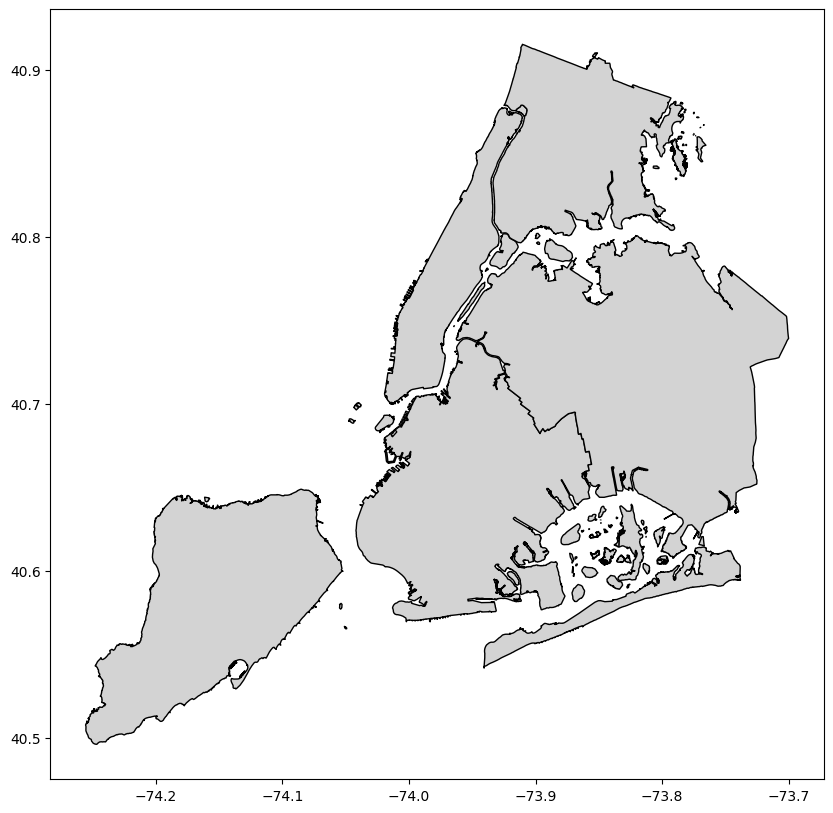

In [ ]:
gdf_arrests = gpd.GeoDataFrame(
    ytd_df, geometry=gpd.points_from_xy(ytd_df['Longitude'], ytd_df['Latitude']))

gdf_arrests.set_crs(epsg=4326, inplace=True)
gdf_felonies = gdf_arrests[gdf_arrests['LAW_CAT_CD'] == 'Misdeameanor']
gdf_nyc = gpd.read_file("Borough Boundaries.zip")
gdf_nyc = gdf_nyc.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(14, 10))
gdf_nyc.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_felonies.plot(ax=ax, markersize=3, alpha=0.2, color='red', label='Felony')
plt.title('Felony Arrests in NYC (2022-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Law Category')

# Show plot
# plt.savefig('2022-2023 Felony GeoSpatial Plotting')
# plt.show()


### Sex

#### Felonies/  Misdemeanor

C:\Users\thech\AppData\Local\Temp\ipykernel_18376\1000391738.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=felonies, x='PERP_SEX', palette='Reds')


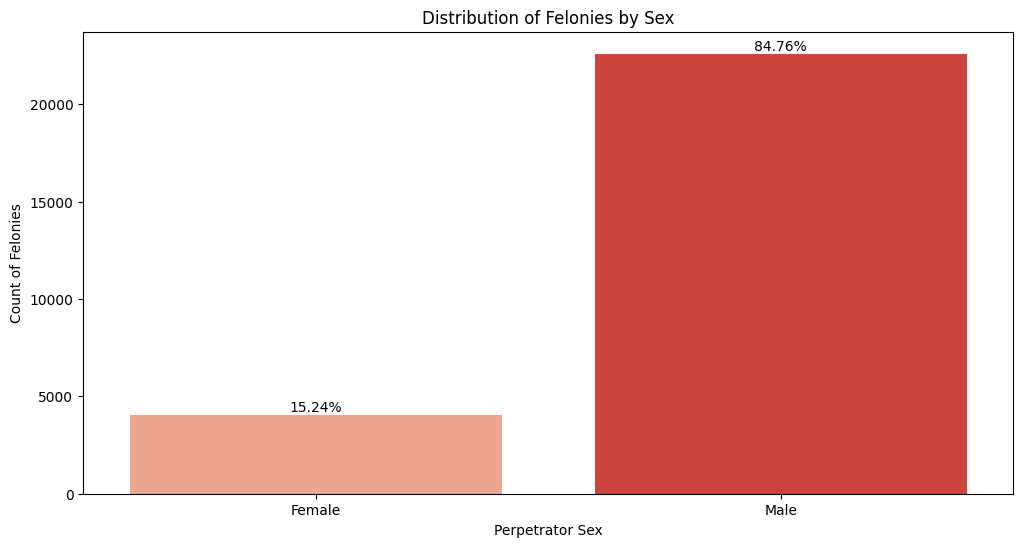

C:\Users\thech\AppData\Local\Temp\ipykernel_18376\1000391738.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=misdemeanors, x='PERP_SEX', palette='Blues')


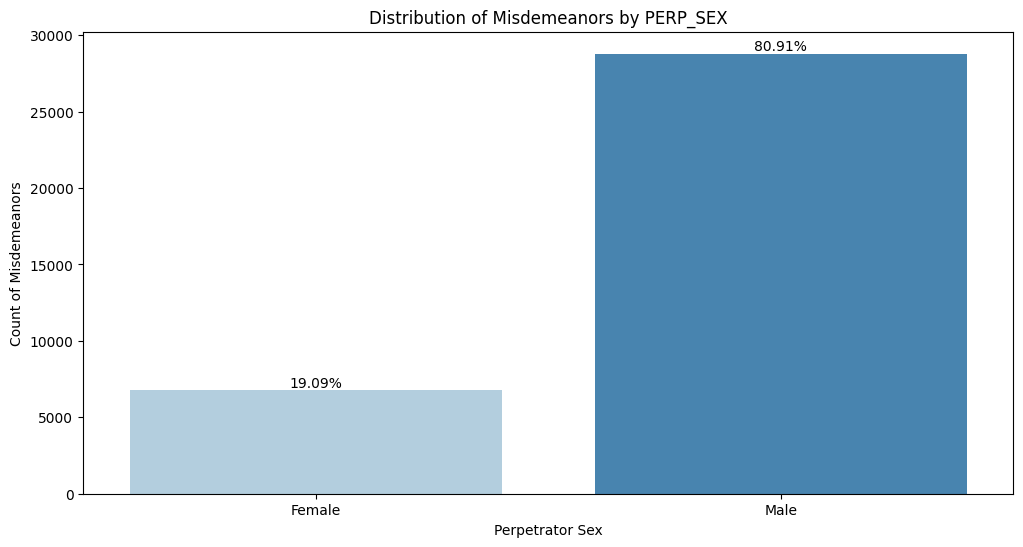

In [ ]:
felonies = ytd_df[ytd_df['LAW_CAT_CD'] == 'Felony']
misdemeanors = ytd_df[ytd_df['LAW_CAT_CD'] == 'Misdemeanor']

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Felonies
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=felonies, x='PERP_SEX', palette='Reds')
total_felonies = len(felonies)
add_annotations(ax, total_felonies)
plt.title('Distribution of Felonies by Sex')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count of Felonies')
plt.show()


#Misdemeanor
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=misdemeanors, x='PERP_SEX', palette='Blues')
total_misdemeanors = len(misdemeanors)
add_annotations(ax, total_misdemeanors)
plt.title('Distribution of Misdemeanors by PERP_SEX')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count of Misdemeanors')
plt.show()


In [ ]:
felonies = ytd_df[ytd_df['LAW_CAT_CD'] == 'Felony']
misdemeanors = ytd_df[ytd_df['LAW_CAT_CD'] == 'Misdemeanor']

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Felonies
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=felonies, x='PERP_SEX', palette='Reds')
total_felonies = len(felonies)
add_annotations(ax, total_felonies)
plt.title('Distribution of Felonies by Sex')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count of Felonies')
plt.show()


#Misdemeanor
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=misdemeanors, x='PERP_SEX', palette='Blues')
total_misdemeanors = len(misdemeanors)
add_annotations(ax, total_misdemeanors)
plt.title('Distribution of Misdemeanors by PERP_SEX')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count of Misdemeanors')
plt.show()


### Race

C:\Users\thech\AppData\Local\Temp\ipykernel_18376\4004774484.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=ytd_df, x='PERP_RACE', palette='viridis')


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

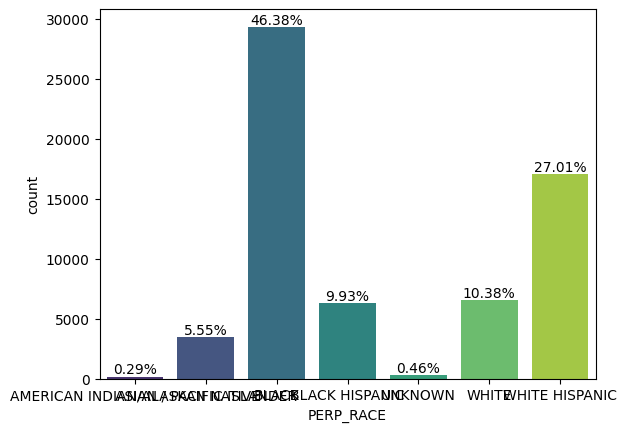

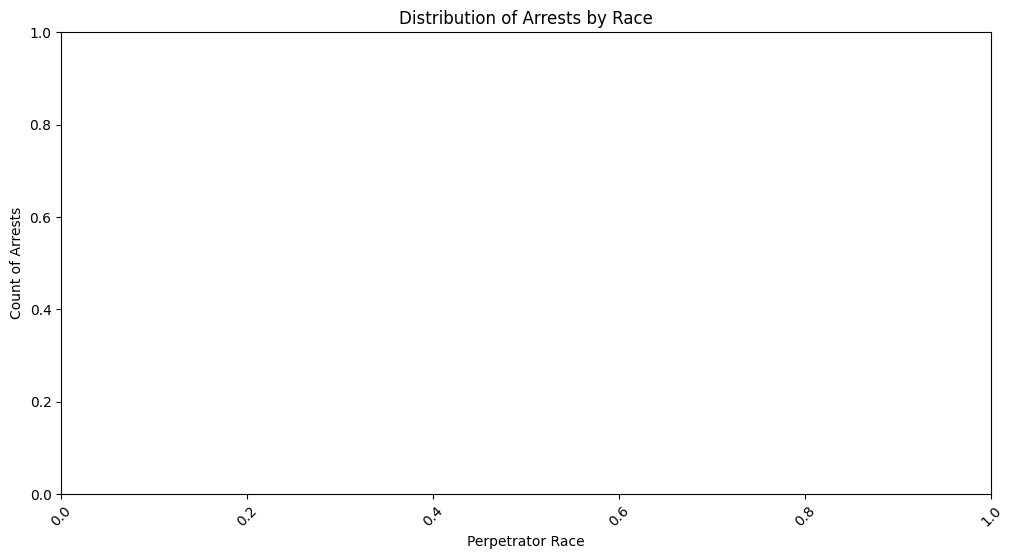

In [ ]:
ax = sns.countplot(data=ytd_df, x='PERP_RACE', palette='viridis')
total_arrests = len(ytd_df)

plt.figure(figsize=(12, 6))

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
add_annotations(ax, total_arrests)
plt.title('Distribution of Arrests by Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
# plt.show()


### Age

C:\Users\thech\AppData\Local\Temp\ipykernel_18376\852992732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette = 'viridis')


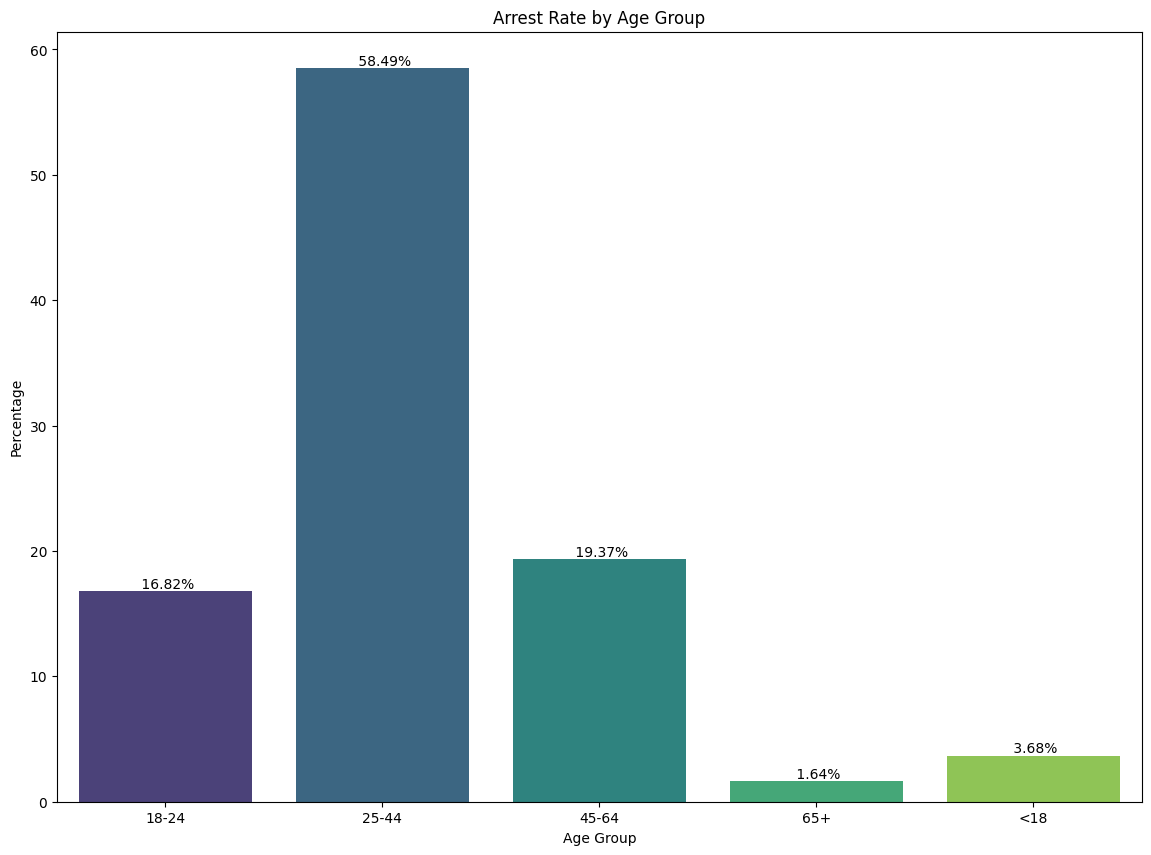

In [ ]:
age_group_counts = ytd_df['AGE_GROUP'].value_counts(normalize=True)*100
age_group_counts
plt.figure(figsize=(14,10))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette = 'viridis')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age Group')
ax.set_title('Arrest Rate by Age Group')
for p in ax.patches:
    ax.annotate(f'{p.get_height(): .2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va= 'center', fontsize= 10, color = 'black',
                xytext= (0,5), textcoords = 'offset points')